In [ ]:
import pandas as pd

Loading Dataset

In [ ]:
df = pd.read_excel('Online Retail.xlsx')
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


Data Processing

In [ ]:
df = df.loc[df['Quantity'] > 0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [ ]:
df['CustomerID'].isna().sum()
df = df.dropna(subset=['CustomerID'])

Creating the customer-item matrix

In [ ]:
customer_item_matrix = df.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum'
)
customer_item_matrix.loc[12481:].head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12481.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0
12483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
12484.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
12488.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
12489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [ ]:
print(customer_item_matrix.shape)
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)

(4339, 3665)


Collaborative Filtering

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
user_user_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix))
user_user_sim_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,4329,4330,4331,4332,4333,4334,4335,4336,4337,4338
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [ ]:

#Renaming index and column names

user_user_sim_matrix.columns = customer_item_matrix.index

user_user_sim_matrix['CustomerID'] = customer_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')
user_user_sim_matrix.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [ ]:
user_user_sim_matrix.loc[12350.0].sort_values(ascending=False).head(10)

CustomerID
12350.0    1.000000
17935.0    0.183340
12414.0    0.181902
12652.0    0.175035
16692.0    0.171499
12791.0    0.171499
16754.0    0.171499
12814.0    0.171499
16426.0    0.166968
16333.0    0.161690
Name: 12350.0, dtype: float64

Making Recommendations

In [ ]:
user_user_sim_matrix.loc[12350.0].sort_values(ascending=False)
items_bought_by_A = customer_item_matrix.loc[12350.0][customer_item_matrix.loc[12350.0]>0]
print("Items Bought by A: ")
print(items_bought_by_A)

Items Bought by A: 
StockCode
20615     1
20652     1
21171     1
21832     1
21864     1
21866     1
21908     1
21915     1
22348     1
22412     1
22551     1
22557     1
22620     1
79066K    1
79191C    1
84086C    1
POST      1
Name: 12350.0, dtype: int64


In [ ]:
items_bought_by_B = customer_item_matrix.loc[17935.0][customer_item_matrix.loc[17935.0]>0]
print("Items bought by B:")
print(items_bought_by_B)

print()

items_to_recommend_to_B = set(items_bought_by_A.index) - set(items_bought_by_B.index)
print("Items to Recommend to B ")
print(items_to_recommend_to_B)
df.loc[df['StockCode'].isin(items_to_recommend_to_B),['StockCode', 'Description']].drop_duplicates().set_index('StockCode')

Items bought by B:
StockCode
20657     1
20659     1
20828     1
20856     1
21051     1
21866     1
21867     1
22208     1
22209     1
22210     1
22211     1
22449     1
22450     1
22551     1
22553     1
22557     1
22640     1
22659     1
22749     1
22752     1
22753     1
22754     1
22755     1
23290     1
23292     1
23309     1
85099B    1
POST      1
Name: 17935.0, dtype: int64

Items to Recommend to B 
{20615, 21832, 21864, 22348, 20652, 22412, '79191C', 21171, 21908, '79066K', '84086C', 21915, 22620}


,Description
StockCode,
21832,CHOCOLATE CALCULATOR
21915,RED HARMONICA IN BOX
22620,4 TRADITIONAL SPINNING TOPS
79066K,RETRO MOD TRAY
21864,UNION JACK FLAG PASSPORT COVER
79191C,RETRO PLASTIC ELEPHANT TRAY
21908,CHOCOLATE THIS WAY METAL SIGN
20615,BLUE POLKADOT PASSPORT COVER
20652,BLUE POLKADOT LUGGAGE TAG


Item-based collaborative filtering

In [ ]:
item_item_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix.T))
item_item_sim_matrix.columns = customer_item_matrix.T.index

item_item_sim_matrix['StockCode'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('StockCode')

In [ ]:
print(item_item_sim_matrix)

StockCode     10002     10080     10120     10125     10133     10135  \
StockCode                                                               
10002      1.000000  0.000000  0.094868  0.090351  0.062932  0.098907   
10080      0.000000  1.000000  0.000000  0.032774  0.045655  0.047836   
10120      0.094868  0.000000  1.000000  0.057143  0.059702  0.041703   
10125      0.090351  0.032774  0.057143  1.000000  0.042644  0.044682   
10133      0.062932  0.045655  0.059702  0.042644  1.000000  0.280097   
...             ...       ...       ...       ...       ...       ...   
C2         0.029361  0.000000  0.000000  0.000000  0.036955  0.019360   
DOT        0.000000  0.000000  0.000000  0.000000  0.000000  0.104257   
M          0.066915  0.016182  0.070535  0.070535  0.070185  0.066184   
PADS       0.000000  0.000000  0.000000  0.000000  0.049752  0.000000   
POST       0.078217  0.000000  0.010993  0.070669  0.021877  0.034383   

StockCode     11001     15030     15034     15036 

Making Recommendations

In [ ]:
top_10_similar_items = list(item_item_sim_matrix.loc[23166].sort_values(ascending=False).iloc[:10].index)

print(top_10_similar_items)
print()
print(df.loc[
    df['StockCode'].isin(top_10_similar_items),
    ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode').loc[top_10_similar_items])

[23166, 23165, 23167, 22993, 23307, 22722, 22720, 22666, 23243, 22961]

                                   Description
StockCode                                     
23166           MEDIUM CERAMIC TOP STORAGE JAR
23165            LARGE CERAMIC TOP STORAGE JAR
23167           SMALL CERAMIC TOP STORAGE JAR 
22993             SET OF 4 PANTRY JELLY MOULDS
23307      SET OF 60 PANTRY DESIGN CAKE CASES 
22722        SET OF 6 SPICE TINS PANTRY DESIGN
22720        SET OF 3 CAKE TINS PANTRY DESIGN 
22666          RECIPE BOX PANTRY YELLOW DESIGN
23243      SET OF TEA COFFEE SUGAR TINS PANTRY
22961                   JAM MAKING SET PRINTED


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

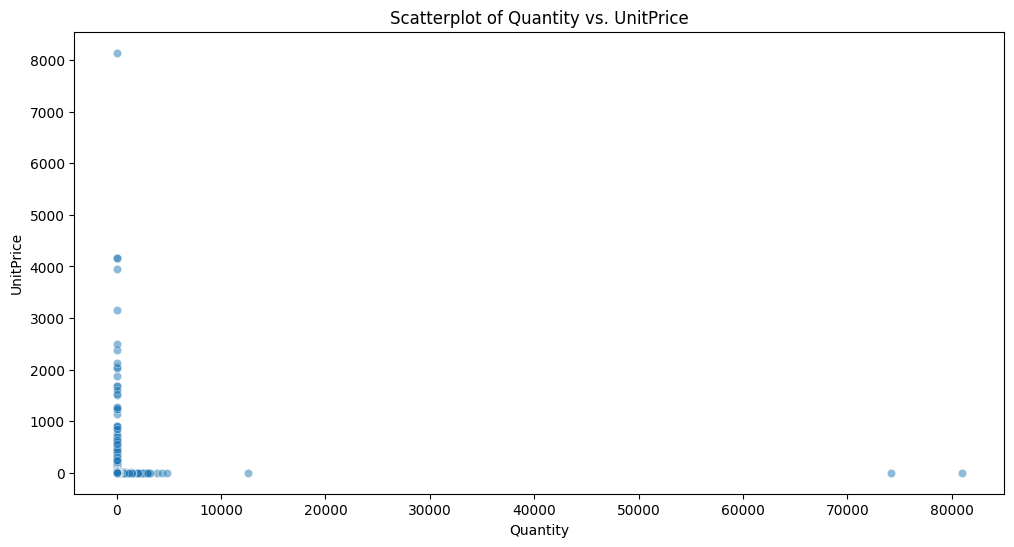

In [26]:
# A scatterplot of Quantity vs. UnitPrice
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Quantity', y='UnitPrice', alpha=0.5)
plt.title('Scatterplot of Quantity vs. UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

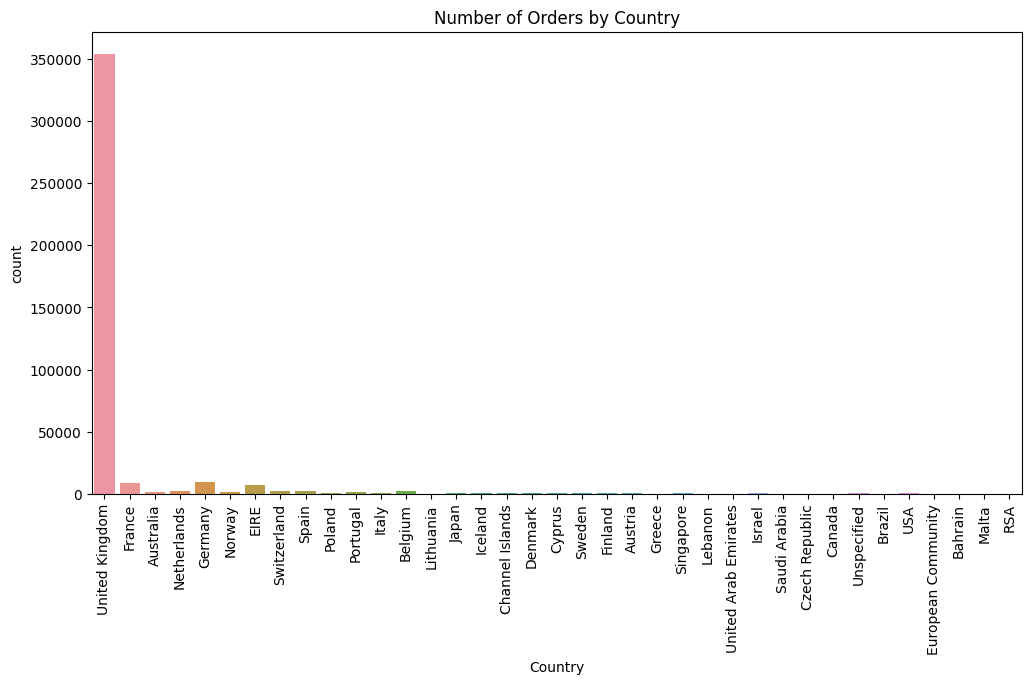

In [27]:
#  A simple count plot for the 'Country' column
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Country')
plt.xticks(rotation=90)
plt.title('Number of Orders by Country')
plt.show()